In [19]:
import pandas as pd
import numpy as np
import math

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier as MLP
rand_state = 2022

from util import *

In [21]:
df_raw = pd.read_csv('data/spaceship-titanic.csv').rename(columns={'Transported':'y'})
df_raw.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,y
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [34]:
df_raw['y'].value_counts()

True     4378
False    4315
Name: y, dtype: int64

In [22]:
def preprocess(data_raw, cat_cols = [], num_cols = [], y_col = 'y', drop_cols = []):
    data = data_raw.copy()
    
    for c in cat_cols:
        data.loc[data[c].isnull(),c] = data[c].mode().values[0]
    for c in num_cols:
        data.loc[data[c].isnull(),c] = data[c].median()
    data = pd.get_dummies(data, columns=cat_cols, drop_first = True)
    scaler = MinMaxScaler()
    data[num_cols] = scaler.fit_transform(data[num_cols])
        
    return data.drop(columns=drop_cols)

In [23]:
data = preprocess(df_raw
                  , cat_cols = ['HomePlanet','CryoSleep','VIP','Destination']
                  , num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
                  , drop_cols = ['PassengerId','Name','Cabin'])
data.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,y,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,VIP_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,False,1,0,0,0,0,1
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,True,0,0,0,0,0,1
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,False,1,0,0,1,0,1
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,False,1,0,0,0,0,1
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,True,0,0,0,0,0,1


# tree

train roc_auc score: [0.71938233 0.76775359 0.83743957 0.89363952 0.91300412 0.93170727
 0.98600458]
test roc_auc score: [0.71938276 0.76299847 0.82880939 0.85638808 0.84489866 0.8276338
 0.75068049]


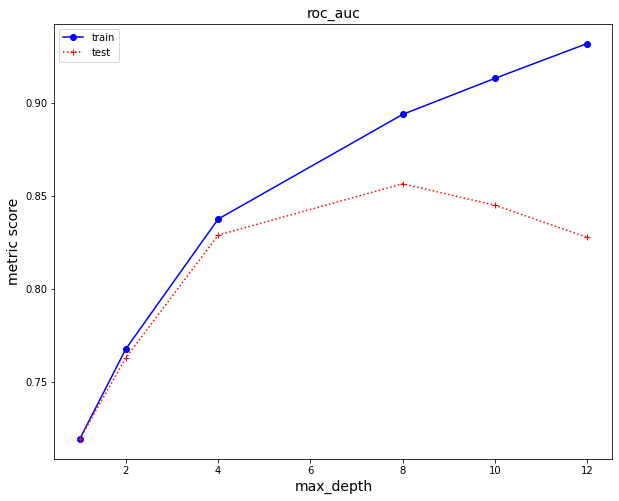

train neg_log_loss score: [-0.58081888 -0.54328098 -0.47550119 -0.39591892 -0.35872101 -0.31828344
 -0.13361515]
test neg_log_loss score: [-0.58129713 -0.54844519 -0.50350306 -0.86026295 -1.48056802 -2.25825424
 -6.68622277]


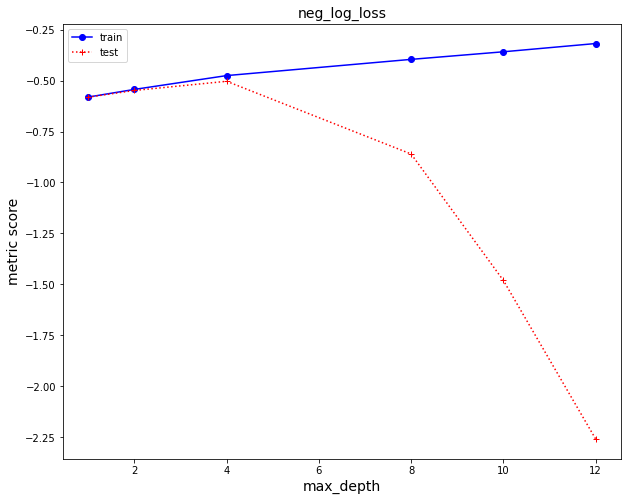

train accuracy score: [0.71827922 0.7222194  0.7689809  0.80619483 0.82178215 0.84355258
 0.93106526]
test accuracy score: [0.71828134 0.72012148 0.75958168 0.78201108 0.77671929 0.77108162
 0.7369136 ]


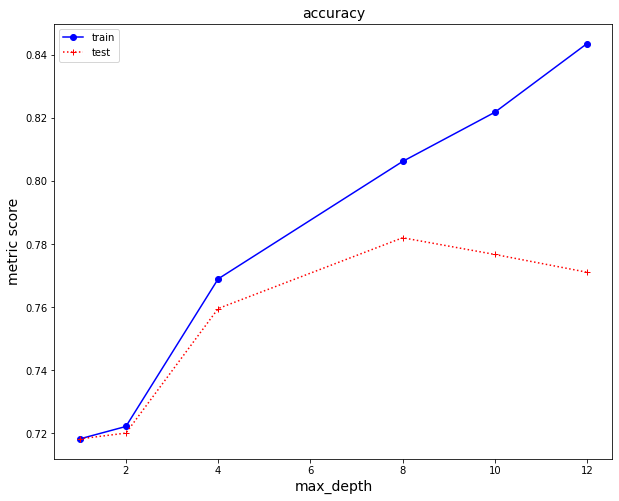

mean fit time: [0.00653915 0.00312486 0.00624628 0.01250362 0.01562724 0.01562362
 0.02500072]


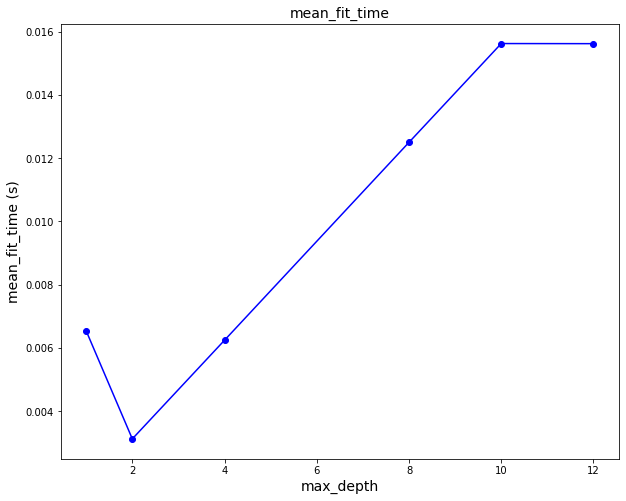

In [35]:
train_test(data, DTC(), {'max_depth':[1,2,4,8,10,12,None]},metric = ['roc_auc','neg_log_loss','accuracy'])

# svc

train roc_auc score: [0.85526268 0.8466209  0.84744589]
test roc_auc score: [0.8540997  0.84409808 0.84519432]


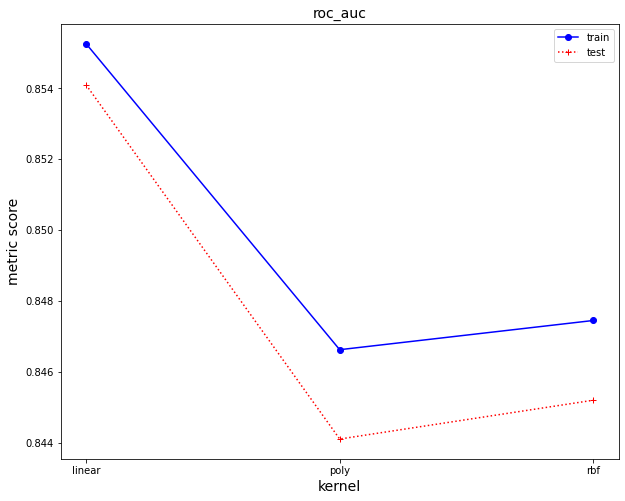

train neg_log_loss score: [-0.49553552 -0.50687282 -0.50500058]
test neg_log_loss score: [-0.49701388 -0.50983553 -0.50839216]


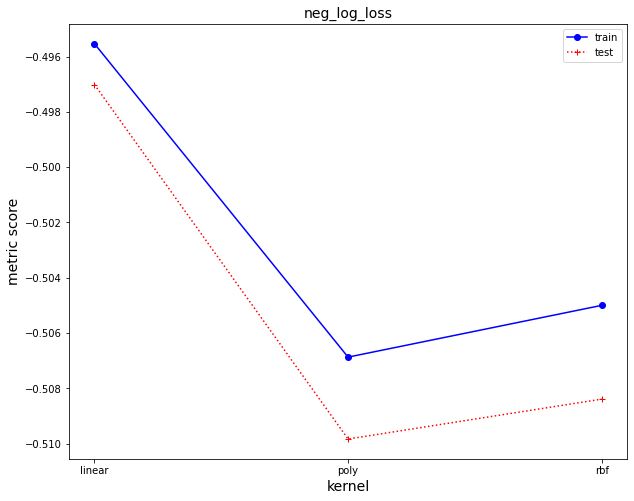

train accuracy score: [0.75589568 0.76489706 0.76423564]
test accuracy score: [0.7558975  0.76417938 0.76302903]


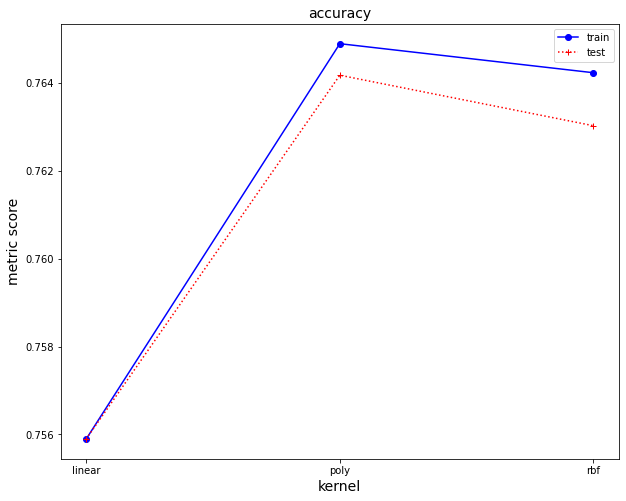

mean fit time: [6.10486174 6.6181694  8.92150955]


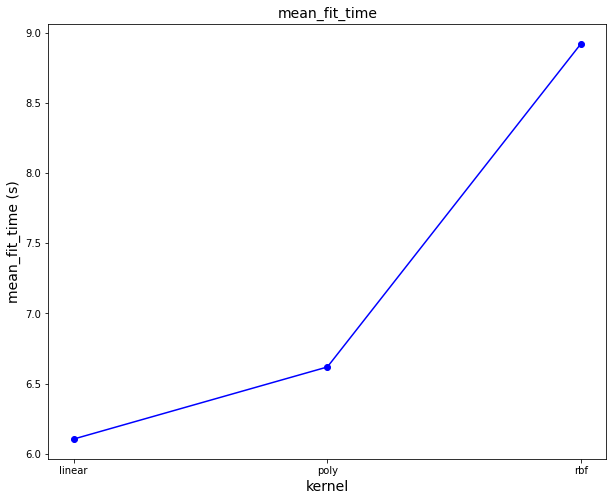

In [36]:
train_test(data, SVC(probability = True), {'kernel':['linear', 'poly', 'rbf']},metric = ['roc_auc','neg_log_loss','accuracy'])

train roc_auc score: [0.84983355 0.8466209  0.85018789 0.85064966 0.85510514]
test roc_auc score: [0.84754804 0.84409808 0.84560807 0.84187701 0.8432728 ]


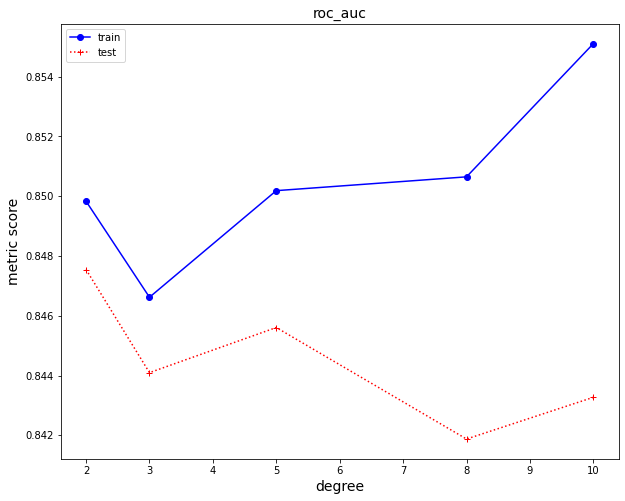

train neg_log_loss score: [-0.51367463 -0.50686845 -0.50823991 -0.50718127 -0.50475698]
test neg_log_loss score: [-0.51630108 -0.50984411 -0.51345301 -0.51609322 -0.51820286]


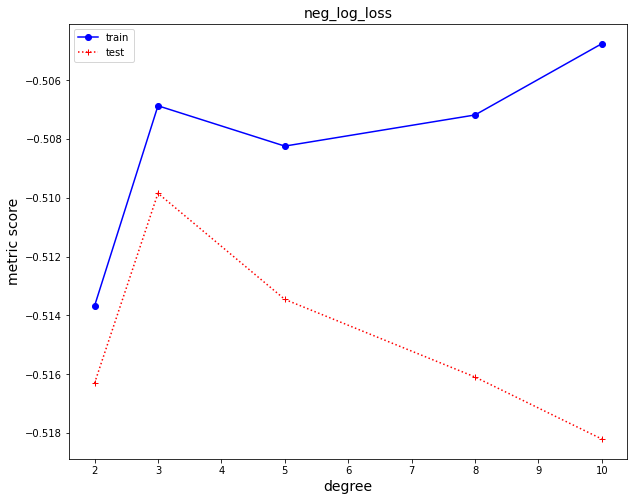

train accuracy score: [0.75468778 0.76489706 0.76524222 0.76570241 0.76624886]
test accuracy score: [0.75520705 0.76417938 0.7631447  0.76026922 0.75900366]


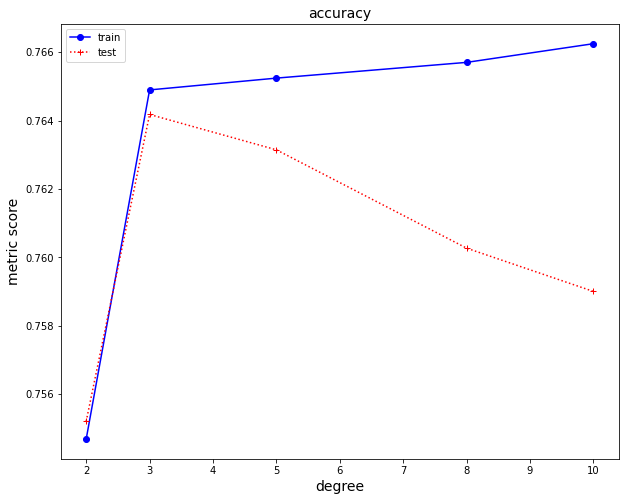

mean fit time: [ 6.86270757  6.86218047  9.36342897 20.34478312 66.05621133]


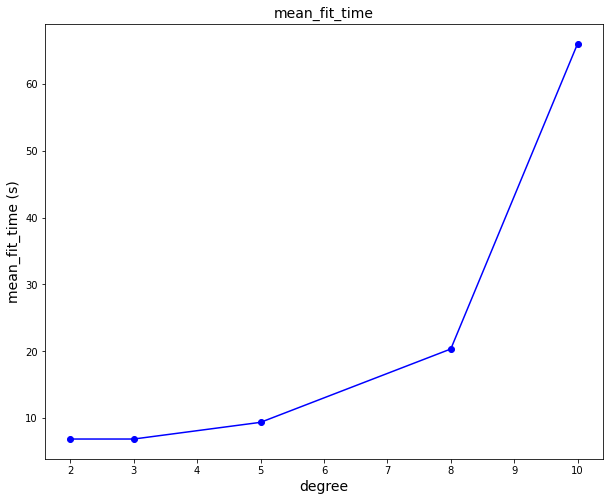

In [37]:
train_test(data, SVC(kernel = 'poly',probability = True), {'degree':[2,3,5,8,10]},metric = ['roc_auc','neg_log_loss','accuracy'])

# knn

train roc_auc score: [0.90282986 0.89526385 0.87824048 0.86616896 0.85926959 0.85241301
 0.83018434 0.79711467 0.79111463]
test roc_auc score: [0.82885929 0.85143097 0.85825071 0.85475768 0.85110562 0.8455745
 0.8263782  0.79442392 0.78893893]


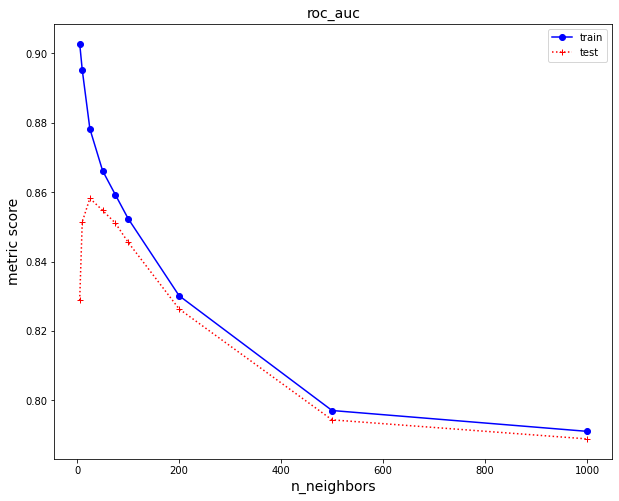

train neg_log_loss score: [-0.57444743 -0.41352932 -0.43055225 -0.45321698 -0.46673502 -0.47823219
 -0.50641358 -0.53635115 -0.56365953]
test neg_log_loss score: [-1.78759806 -0.83733443 -0.50842147 -0.49809019 -0.48146688 -0.49025745
 -0.51099386 -0.53903635 -0.56547251]


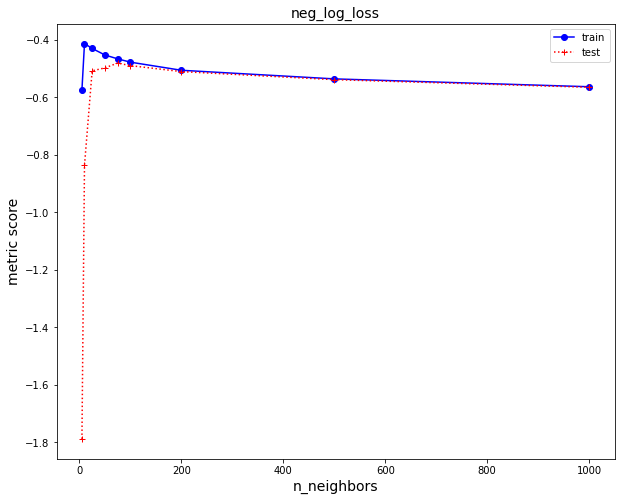

train accuracy score: [0.81646166 0.80185225 0.7914416  0.77611306 0.77090778 0.76593247
 0.74166008 0.72509492 0.71925697]
test accuracy score: [0.75761998 0.76383402 0.77556914 0.76659588 0.76498596 0.76303002
 0.73921754 0.72414844 0.71828035]


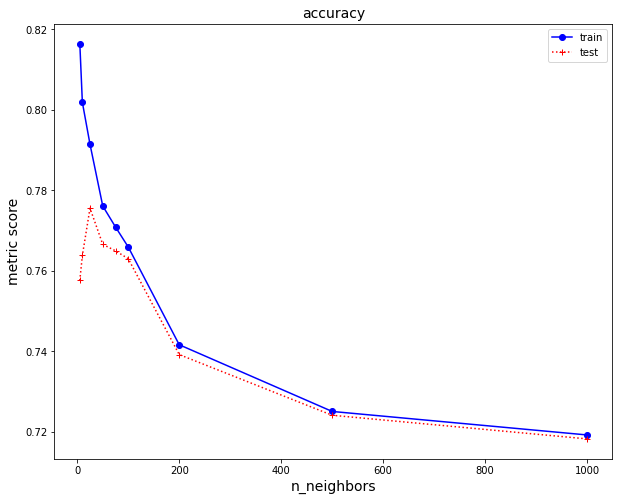

mean fit time: [0.0322423  0.02928338 0.03559856 0.03037205 0.03009543 0.03137631
 0.03497052 0.03125    0.03533459]


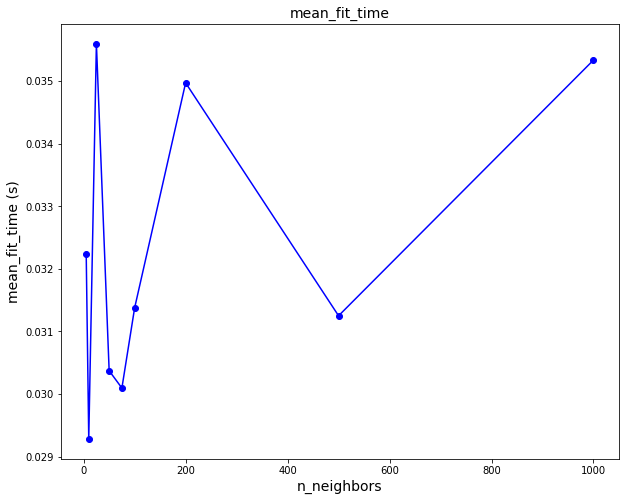

In [38]:
train_test(data, KNNC(), {'n_neighbors':[5,10, 25,50,75,100,200, 500, 1000]},metric = ['roc_auc','neg_log_loss','accuracy'])

# boost tree

train roc_auc score: [0.85498254 0.8720165  0.88646771 0.89232256 0.89609124 0.90702836]
test roc_auc score: [0.84866531 0.8633835  0.87468782 0.8771185  0.87767509 0.87728801]


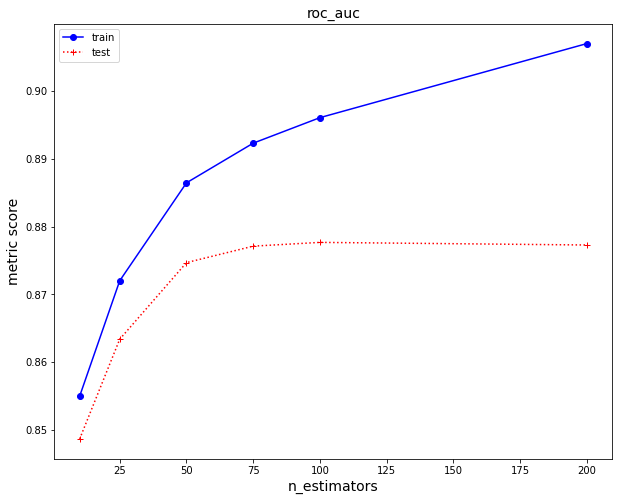

train neg_log_loss score: [-0.53095951 -0.45886313 -0.42955737 -0.41657538 -0.40834278 -0.38646117]
test neg_log_loss score: [-0.53501344 -0.46890901 -0.44620268 -0.43907042 -0.43679438 -0.43647782]


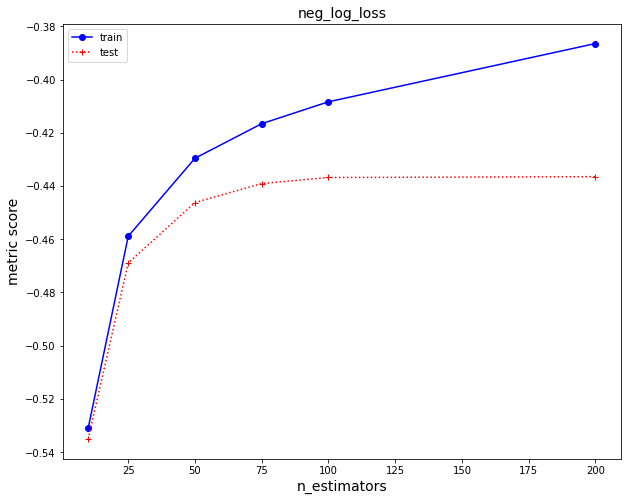

train accuracy score: [0.76196391 0.79699198 0.80245612 0.80605094 0.80976079 0.82054543]
test accuracy score: [0.7553216  0.78856908 0.79109927 0.79282467 0.79408983 0.7937446 ]


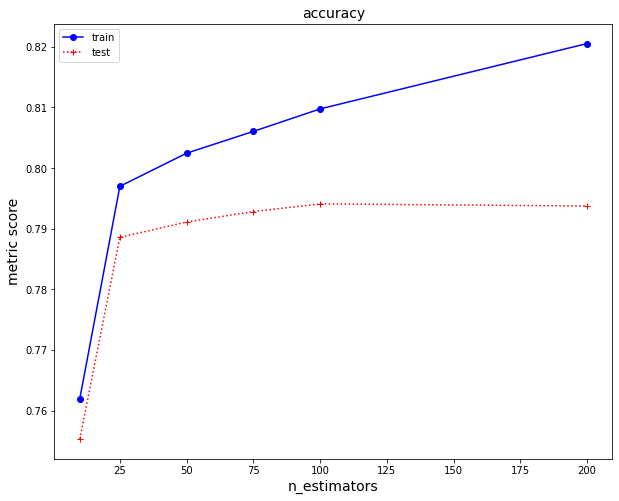

mean fit time: [0.0579051  0.13749123 0.27079711 0.40209026 0.53853202 1.07405114]


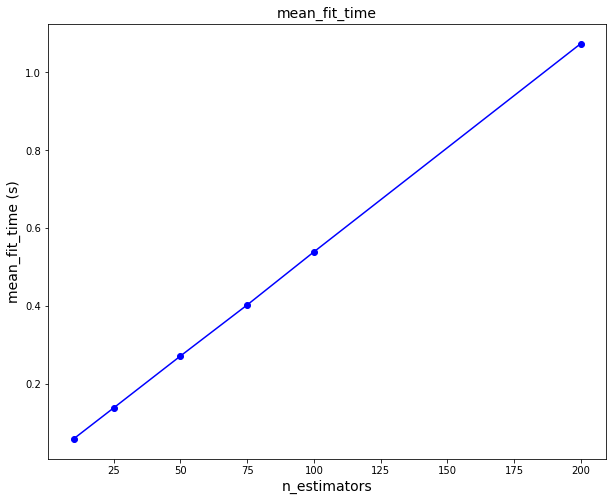

In [39]:
train_test(data, GBC(), {'n_estimators':[10, 25, 50, 75, 100, 200]},metric = ['roc_auc','neg_log_loss','accuracy'])

train roc_auc score: [0.89609124 0.89614686 0.89570148 0.89510589 0.89371821 0.89260885]
test roc_auc score: [0.87765288 0.87805707 0.87752632 0.87760444 0.87810904 0.87736255]


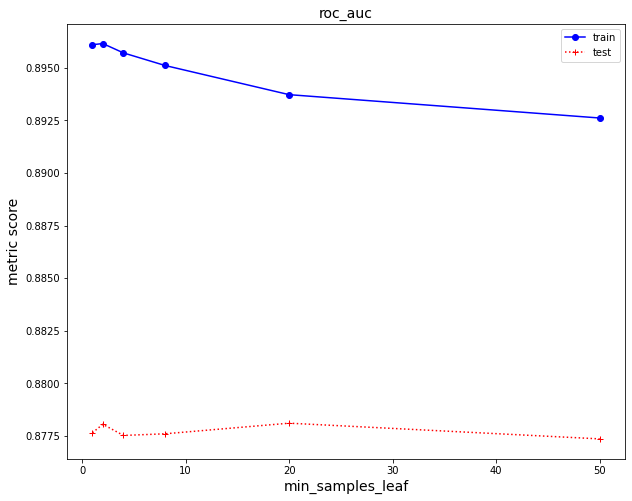

train neg_log_loss score: [-0.40834278 -0.40811355 -0.40891623 -0.4098767  -0.41150397 -0.41357968]
test neg_log_loss score: [-0.43682703 -0.43625159 -0.43723912 -0.43716011 -0.43627627 -0.43730159]


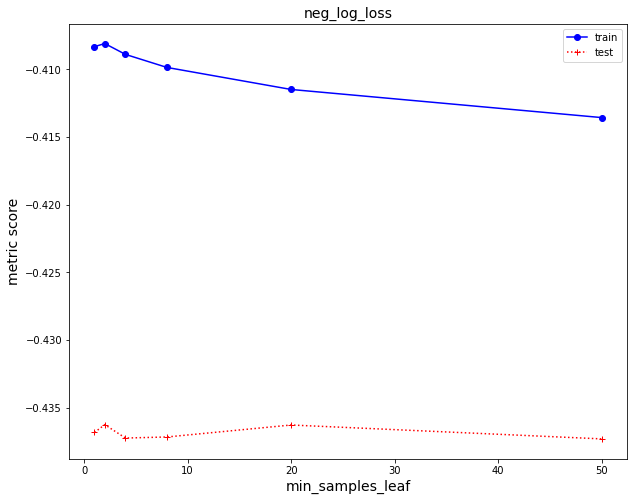

train accuracy score: [0.80976079 0.80958826 0.80981829 0.81079618 0.8083804  0.80728755]
test accuracy score: [0.7942049  0.79351472 0.79443472 0.79339951 0.79443452 0.79201908]


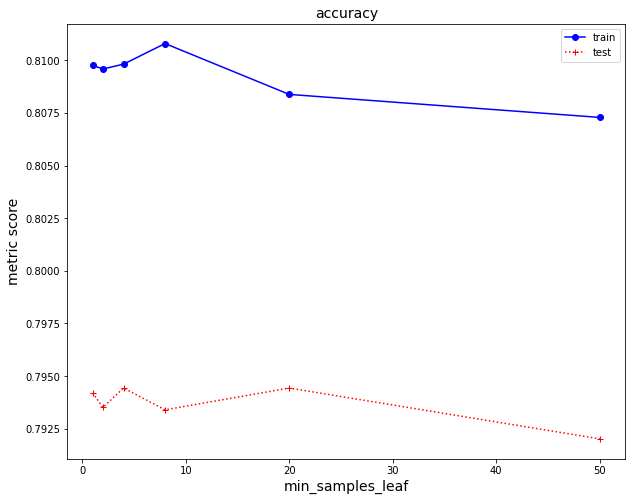

mean fit time: [0.53799071 0.53462429 0.53004627 0.53417983 0.53505502 0.5311523 ]


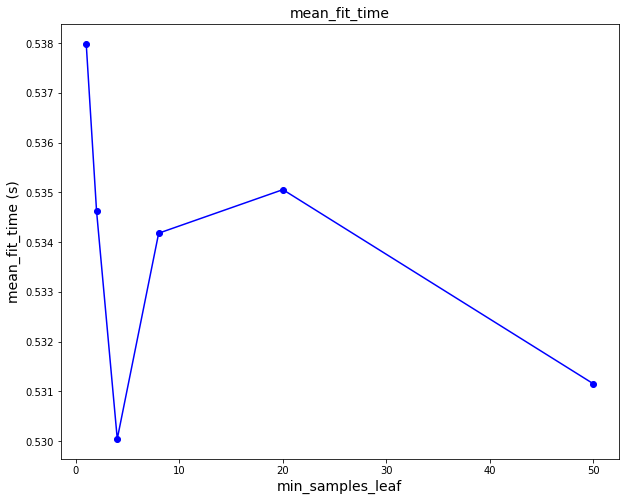

In [40]:
train_test(data, GBC(), {'n_estimators':[100],'min_samples_leaf':[1,2,4,8,20,50]},metric = ['roc_auc','neg_log_loss','accuracy'])

train roc_auc score: [0.85947257 0.88207319 0.89609124 0.90916099 0.97945007 0.98600458]
test roc_auc score: [0.85289752 0.87268299 0.87765553 0.87854142 0.86272617 0.84098957]


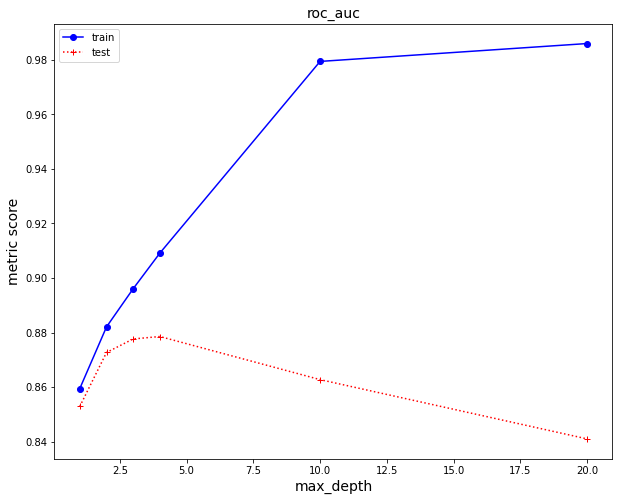

train neg_log_loss score: [-0.47978812 -0.43612986 -0.40834278 -0.38492403 -0.1977123  -0.13377563]
test neg_log_loss score: [-0.48679851 -0.45054085 -0.43681372 -0.43479477 -0.49049205 -0.9617936 ]


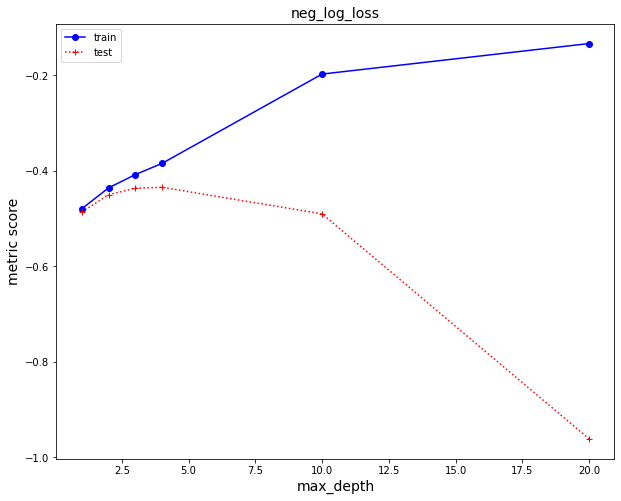

train accuracy score: [0.78974495 0.80113326 0.80976079 0.82247217 0.92470956 0.93106526]
test accuracy score: [0.78223964 0.79052357 0.7942049  0.79696623 0.78787665 0.77522186]


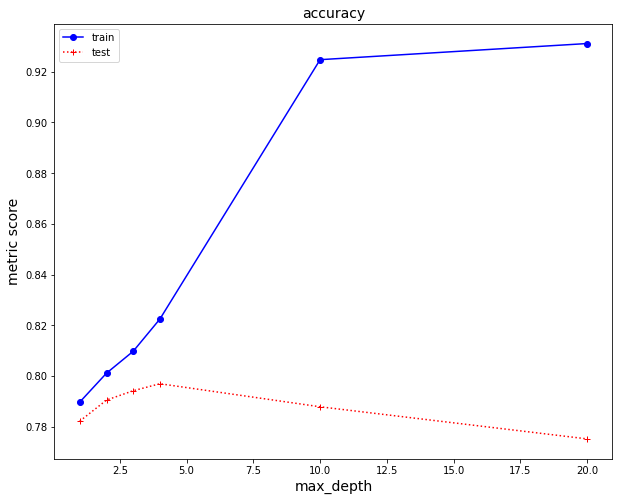

mean fit time: [0.23319125 0.38699441 0.53354611 0.69383693 2.20951757 8.11715288]


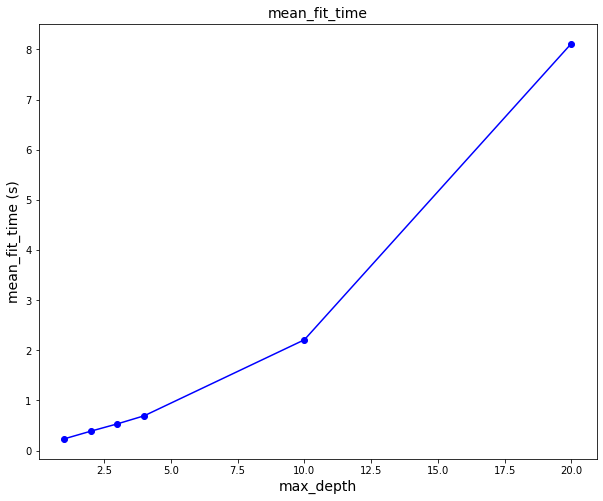

In [41]:
train_test(data, GBC(), {'n_estimators':[100],'max_depth':[1,2,3,4,10,20]},metric = ['roc_auc','neg_log_loss','accuracy'])

# NN

train roc_auc score: [0.87558744 0.88175361 0.88357657 0.8853809  0.88651493]
test roc_auc score: [0.87375432 0.87827342 0.87906746 0.88029744 0.87992551]


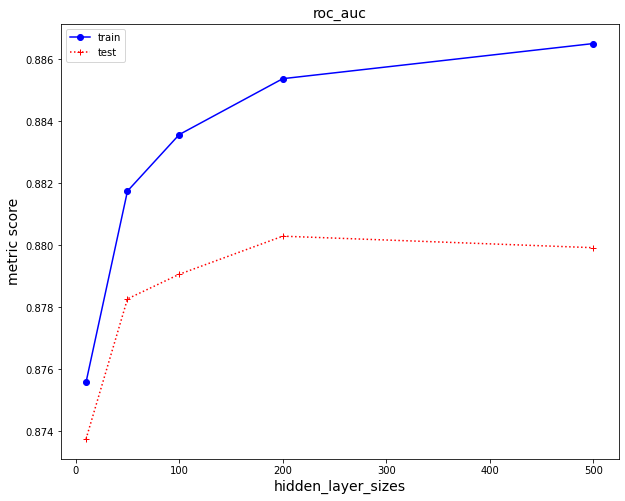

train neg_log_loss score: [-0.43637557 -0.4252425  -0.42135012 -0.41768241 -0.41517911]
test neg_log_loss score: [-0.4417167  -0.43293814 -0.43156524 -0.42945978 -0.42981301]


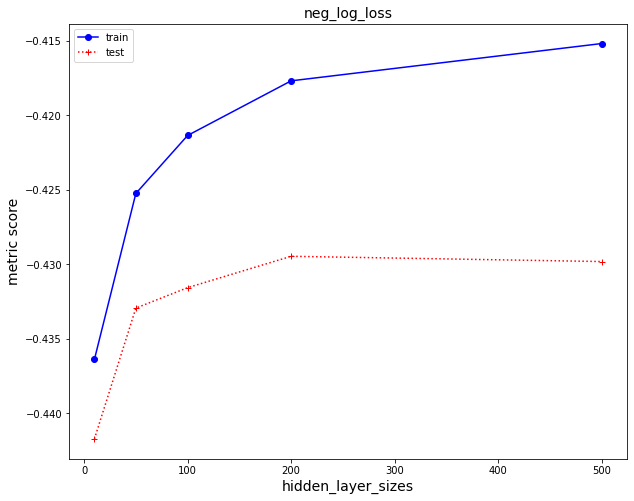

train accuracy score: [0.79299445 0.79699194 0.79877502 0.79929269 0.8005581 ]
test accuracy score: [0.78891173 0.79328351 0.79512418 0.79489396 0.79615972]


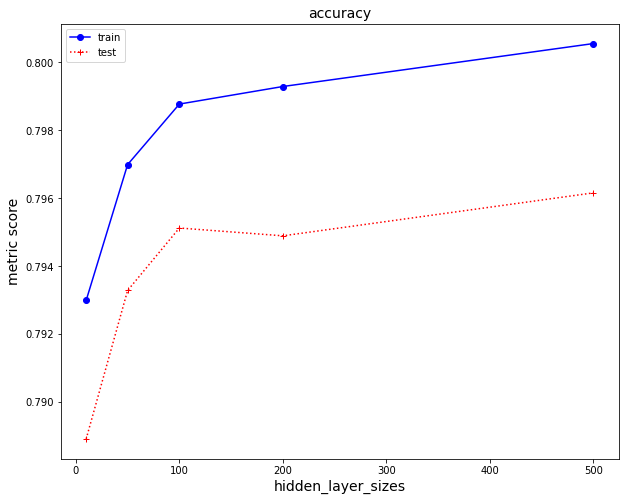

mean fit time: [ 1.90445461  3.85667768  4.24273705  5.89123693 10.28557315]


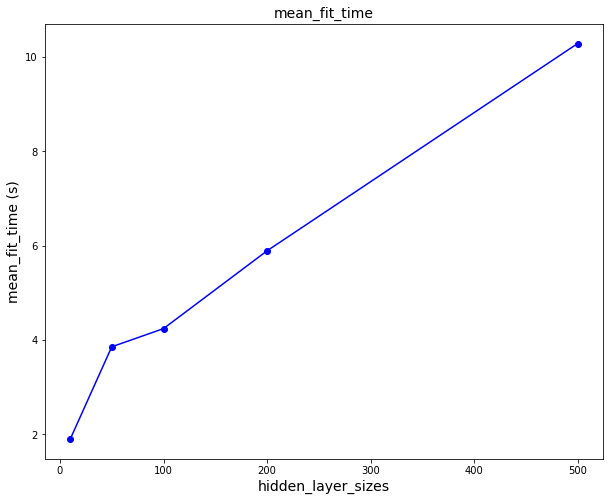

In [42]:
train_test(data, MLP(), {'hidden_layer_sizes':[10,50,100,200,500], 'max_iter':[1000]},metric = ['roc_auc','neg_log_loss','accuracy'])

train roc_auc score: [0.88281126 0.88593714 0.88355382 0.87498964]
test roc_auc score: [0.87806254 0.88005298 0.87920949 0.87346929]


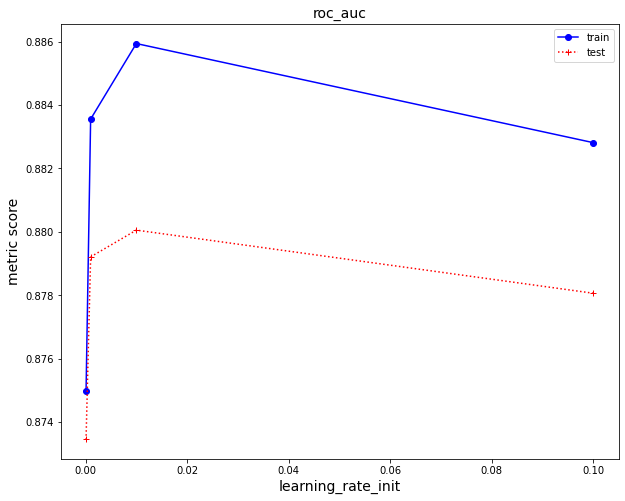

train neg_log_loss score: [-0.42684757 -0.41770949 -0.42165684 -0.43728822]
test neg_log_loss score: [-0.44240516 -0.42849369 -0.4331329  -0.4420801 ]


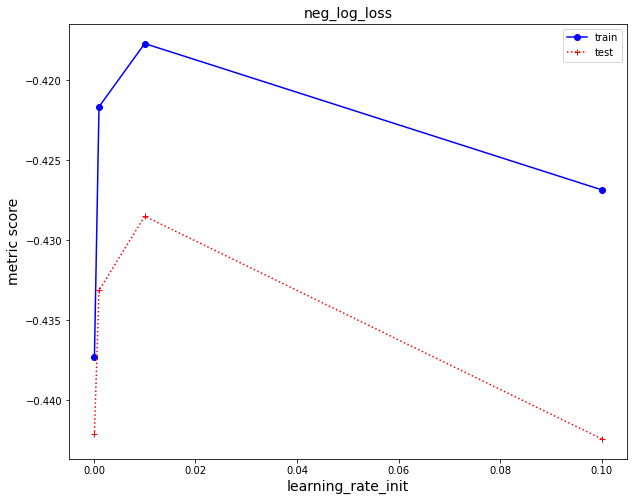

train accuracy score: [0.79437481 0.79992543 0.7967618  0.79118272]
test accuracy score: [0.78615218 0.79558474 0.79236324 0.78960191]


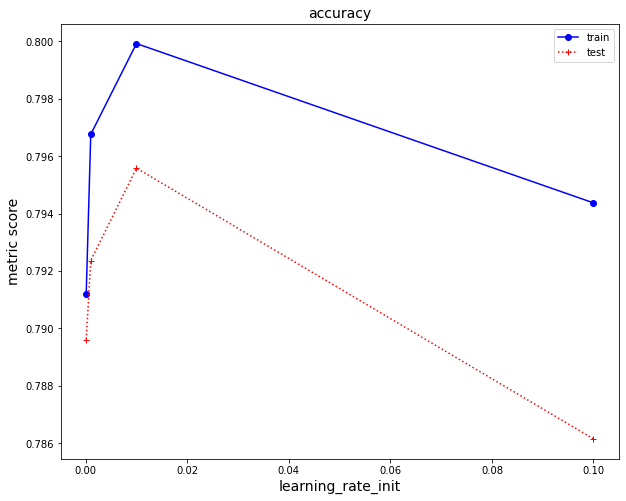

mean fit time: [0.87679944 1.60419583 4.14422789 6.90718899]


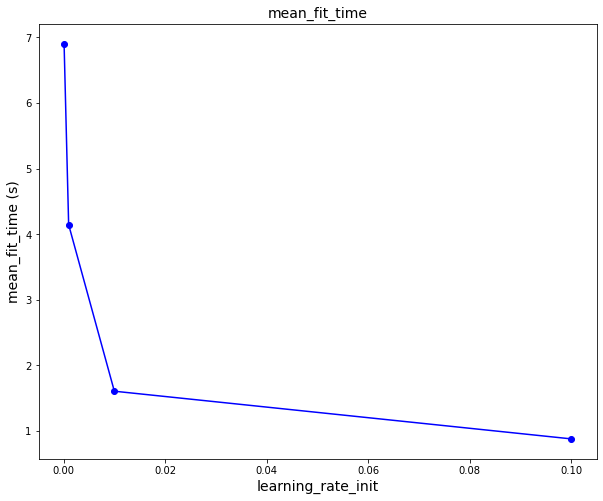

In [43]:
train_test(data, MLP(), {'hidden_layer_sizes':[100], 'max_iter':[1000],'learning_rate_init':[0.1,0.01,0.001,0.0001]},metric = ['roc_auc','neg_log_loss','accuracy'])